In [16]:
from mlxtend.preprocessing import TransactionEncoder  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

## Applying it on the small data set 

In [17]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]



In [18]:
# encoding values 
tr = TransactionEncoder()
tab= tr.fit(dataset).transform(dataset)
columns = dict()
for i in range(len(tr.columns_)):
    columns[i] = tr.columns_[i]

df  = pd.DataFrame(tab)
tab = tab.astype("int")
df= df.rename(columns,axis=1)
df


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


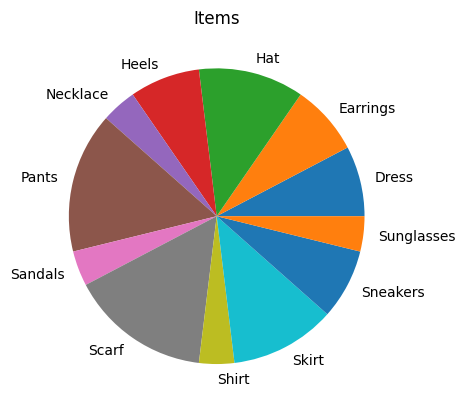

In [19]:
# changing the colomns name 
sumColoumns = list()
for i in list(columns.values()):
    num = 0
    for j in df[i]:
        if j:
            num += 1
    sumColoumns.append(num)
fig, ax = plt.subplots()
ax.pie(sumColoumns, labels=list(columns.values()))
ax.set_title('Items')
plt.show()

In [20]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


In [21]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.6) # associate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


we have 4 rules 

## Applying it on a bigger dataset 

In [90]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.shape

(7501, 20)

In [92]:
df.size

150020

## Preporcessing the dataset 

since the encoder provided  by mlxtend could not work on the data set i ll create my own encoder 

In [128]:
# the econder function 
def encode(dataframe):
    if type(dataframe) is pd.DataFrame : 
        items = pd.Series(dtype='string')
        nbRow,nbCol =  dataframe.shape
        #collecting item set 
        for i in range(nbCol):
            items = pd.concat([items,pd.Series(dataframe[i].unique(),dtype="string")],axis=0) #getting the unique values of each row 
        items=  items.unique() #removing repetitive values
        items =items.dropna() # removing nulls 
        df = pd.DataFrame(columns=items) # seting the columns names as the item set  
        # now we set the columns
        #if  the transaction contains the item than we set the row value to true else false 
        for col in items:
            df[col] = (dataframe.apply(lambda  r: r.astype('string').str.contains(col).any(),axis=1))  # lambda func will return an array of true or false 
        return df
    else:
        raise Exception("The function encode take a pandas data frame as an input")
     


In [130]:
encoded =  encode(df)

In [131]:
encoded

,shrimp,burgers,chutney,turkey,mineral water,low fat yogurt,whole wheat pasta,soup,frozen vegetables,french fries,...,ketchup,cream,hand protein bar,body spray,oatmeal,zucchini,water spray,tea,napkins,asparagus
0,True,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Exploring the dataset

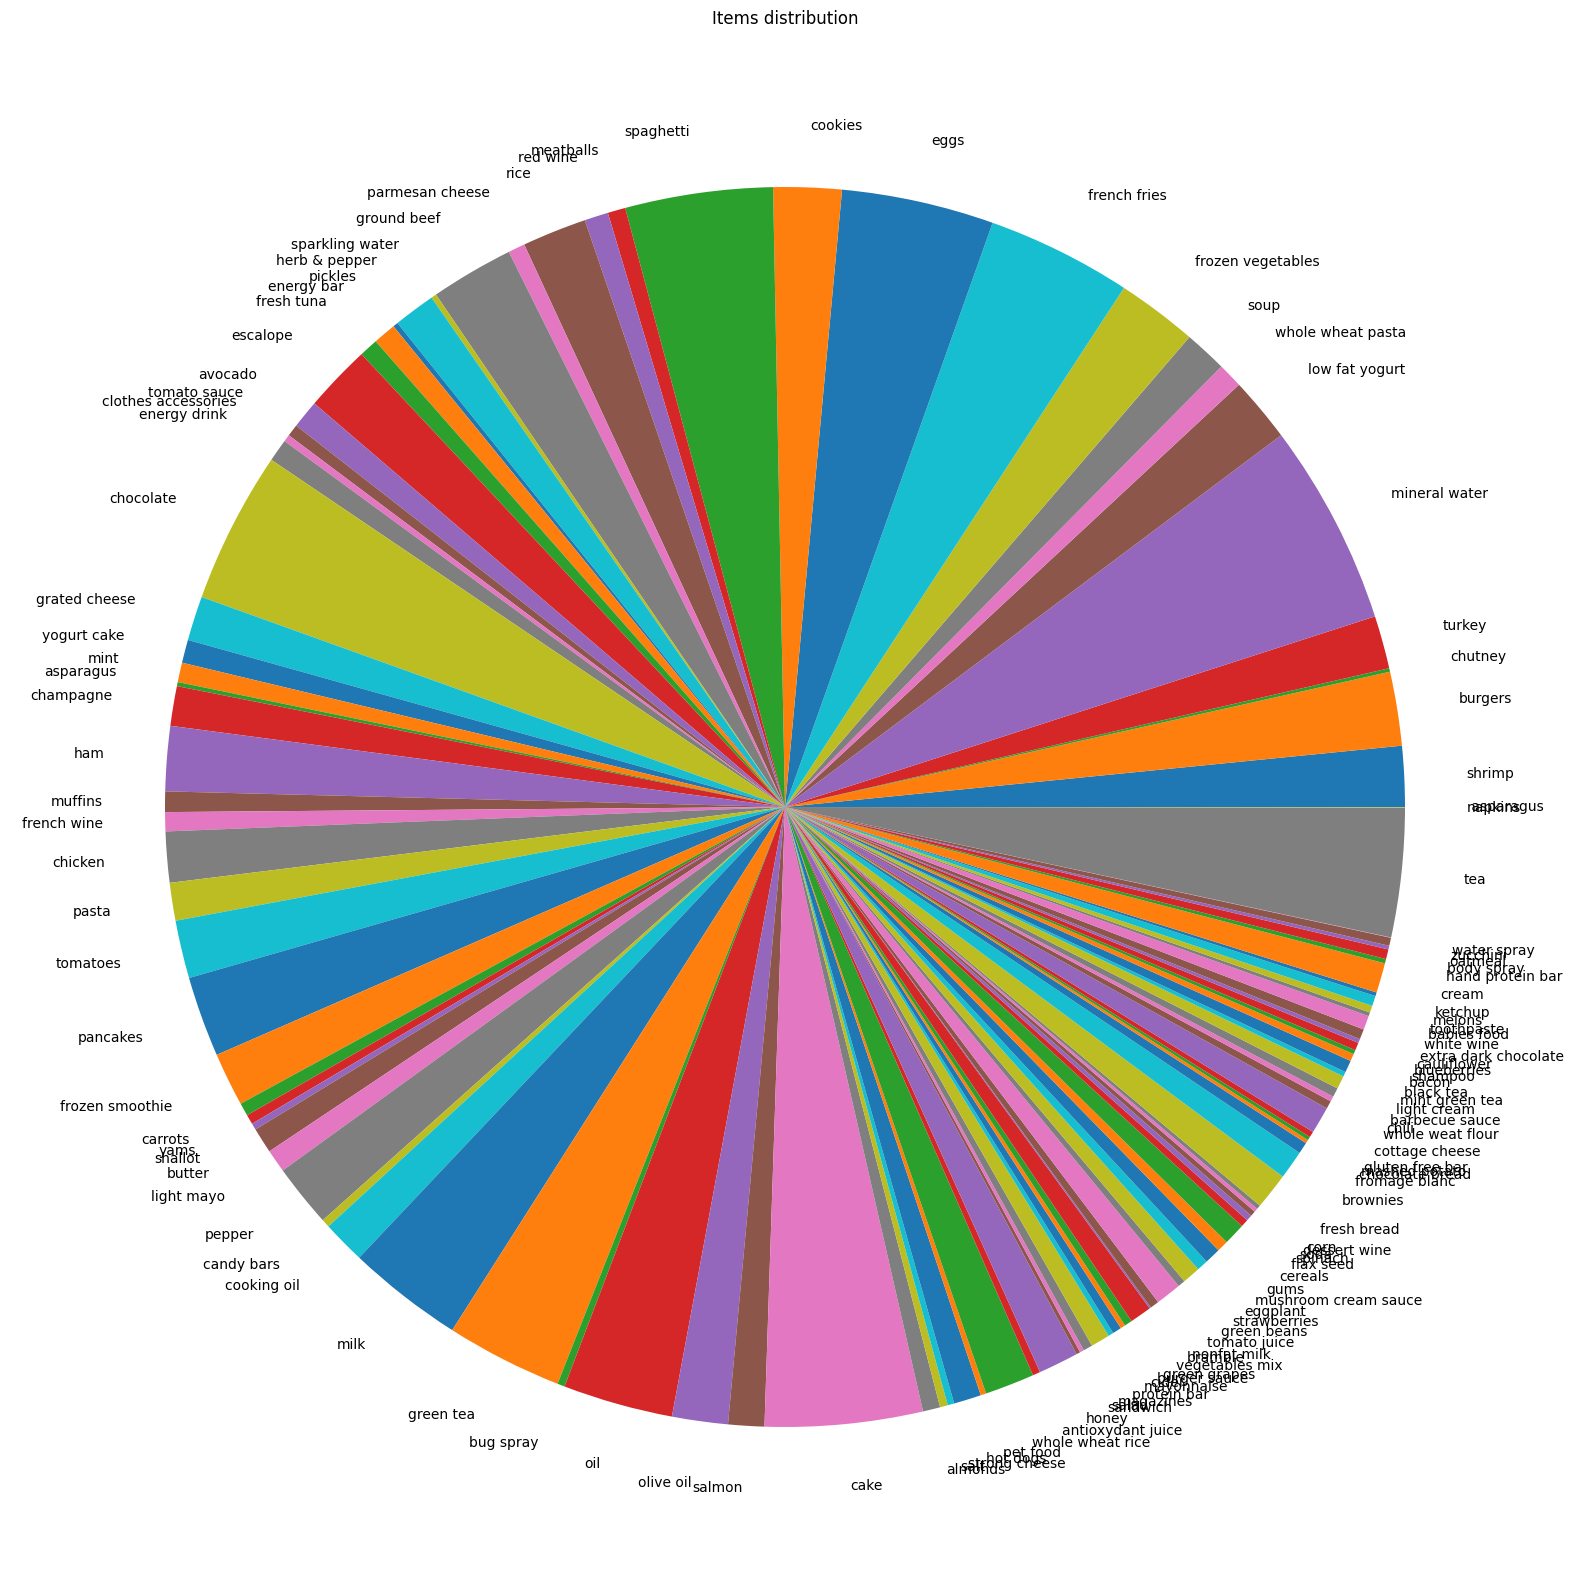

In [171]:
sumColoumns = []
for i in list(encoded.columns):
    num = 0
    for j in encoded[i]:
        if j:
            num += 1
    sumColoumns.append(num)
fig, ax = plt.subplots(figsize=(20,30))
ax.pie(sumColoumns, labels=list(encoded.columns))
ax.set_title('Items distribution')
plt.show()

### Observation :
we notice that the items have different frequencies and some have large frequencies like for example *cake* or *mineral water*

## Applying the Apriori algorithm  

In [140]:
frequent_itemsets=apriori(encoded, use_colnames=True)
frequent_itemsets

,support,itemsets


## issue 

Apriori of mlextend return an empty data frame he could not see any frequent item

### using another library **apyori**
source https://github.com/ymoch/apyori/

In [160]:
from apyori import apriori as  ap
association_rules = ap(encoded, min_support= 0.4, min_confidence=.6, min_lift=1.2)

In [162]:
association_rules = pd.DataFrame(association_rules)
association_rules

,items,support,ordered_statistics
0,"( , e)",0.408333,"[(( ), (e), 0.8448275862068966, 1.206896551724..."
1,"(e, r)",0.408333,"[((r), (e), 0.8448275862068966, 1.206896551724..."


*Ugly output  no idea what does e stand for or wha t r stand for no documentation provided*